<a href="https://colab.research.google.com/github/present42/PyTorchPractice/blob/main/PRML_chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3. Linear Models for Regression

## Section 3.2. The Bias-Variance Decomposition

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def gt(x):
  return np.sin(2 * np.pi * x)

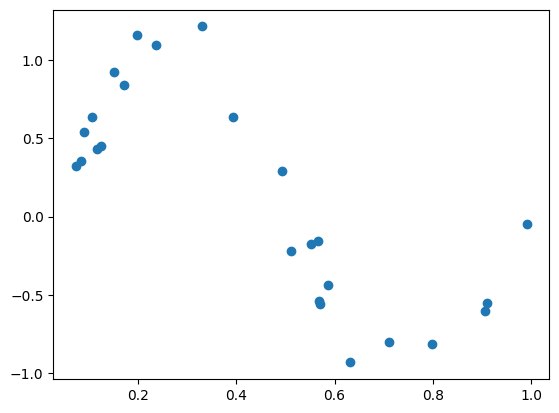

In [102]:
# generate L = 100 data sets each containing N = 25 data points
L = 100
N = 25

inputs = [] # will have a shape of (L, N)
targets = []

for i in range(L):
  inp = np.random.uniform(size=N)
  out = np.sin(2 * np.pi * inp) + np.random.normal(scale=0.3, size=N)
  inputs.append(inp)
  targets.append(out)

plt.scatter(inp, out)

In [158]:
def gaussian_kernel(x, loc, scale=1/24):
  return np.exp(-(x - loc) ** 2 / (2 * scale ** 2))

In [159]:
def kernel(x):
  """ convert scalar input x of (1, ) to output phi(x) of (M, )"""
  locs = np.linspace(-0.5, 1.5, 24)
  out = [1]
  for loc in locs:
    out.append(gaussian_kernel(x, loc))
  return np.array(out)

In [160]:
kernel(0)

array([1.00000000e+000, 5.38018616e-032, 4.58438766e-022, 5.01469587e-014,
       7.04185528e-008, 1.26943019e-003, 2.93771583e-001, 8.72750238e-001,
       3.32850643e-002, 1.62962642e-005, 1.02424993e-010, 8.26424271e-018,
       8.56011137e-027, 1.13824303e-037, 1.94298664e-050, 4.25778632e-065,
       1.19778023e-081, 4.32563283e-100, 2.00540178e-120, 1.19352734e-142,
       9.11890263e-167, 8.94400468e-193, 1.12616153e-220, 1.82032357e-250,
       3.77724997e-282])

In [161]:
def input_to_design(inputs, kernel):
  """ convert input of shape (N, ) to design matrices of shape (N, M) using `kernel` transformation """
  out = []
  for input in inputs:
    out.append(kernel(input))
  out = np.vstack(out)
  return out

In [162]:
phi = input_to_design(inputs[0], kernel)
phi.shape

(25, 25)

In [163]:
def w_mle(targets, design_matrix, lambd=13.463738):
  """ computes mle solution for w using `targets` with regularizing coefficient lambd
  Args:
    - targets: (N, )
    - design_matrix: (N, M)
    - lambd: scalar

  Returns:
    - w: (M, )

  """
  N, M = design_matrix.shape
  res = np.linalg.inv(lambd * np.eye(M) + design_matrix.T @ design_matrix) @ design_matrix.T @ targets[:, np.newaxis]
  return res.reshape(-1)

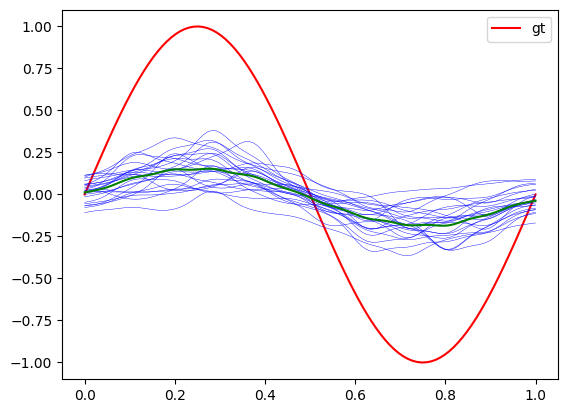

In [164]:
xs = np.linspace(0, 1, 100) # (N, )
design_matrix = input_to_design(xs, kernel) # (N, M)

plt.plot(xs, gt(xs), 'r', label='gt')

w_avg = np.zeros((25, ))
for l in range(L):
  phi = input_to_design(inputs[l], kernel) # design matrix from input of each data
  w = w_mle(targets[l], phi) # coefficient from each dataset (M, )
  w_avg = (l / (l + 1)) * w_avg + (1 / (l + 1)) * w
  if l < L // 4:
    plt.plot(xs, design_matrix @ w[:, np.newaxis], 'b', linewidth=0.3)

plt.plot(xs, design_matrix @ w_avg[:, np.newaxis], 'g')
plt.legend();

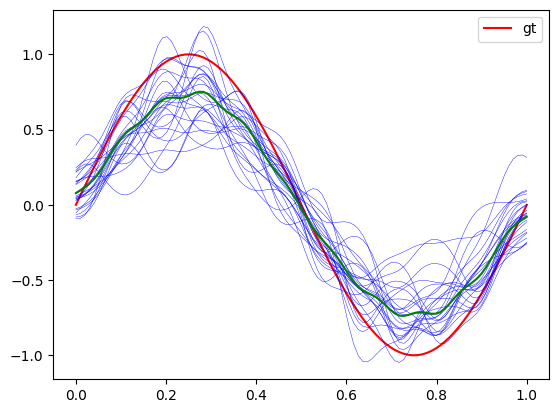

In [165]:
xs = np.linspace(0, 1, 100) # (N, )
design_matrix = input_to_design(xs, kernel) # (N, M)

plt.plot(xs, gt(xs), 'r', label='gt')

w_avg = np.zeros((25, ))
for l in range(L):
  phi = input_to_design(inputs[l], kernel) # design matrix from input of each data
  w = w_mle(targets[l], phi, lambd=0.7334) # coefficient from each dataset (M, )
  w_avg = (l / (l + 1)) * w_avg + (1 / (l + 1)) * w
  if l < L // 4:
    plt.plot(xs, design_matrix @ w[:, np.newaxis], 'b', linewidth=0.3)

plt.plot(xs, design_matrix @ w_avg[:, np.newaxis], 'g')
plt.legend();

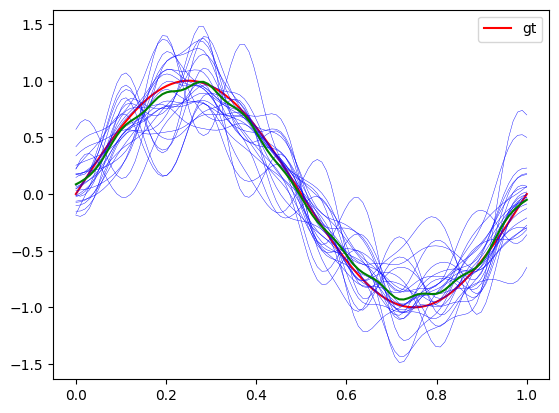

In [166]:
xs = np.linspace(0, 1, 100) # (N, )
design_matrix = input_to_design(xs, kernel) # (N, M)

plt.plot(xs, gt(xs), 'r', label='gt')

w_avg = np.zeros((25, ))
for l in range(L):
  phi = input_to_design(inputs[l], kernel) # design matrix from input of each data
  w = w_mle(targets[l], phi, lambd=0.0907) # coefficient from each dataset (M, )
  w_avg = (l / (l + 1)) * w_avg + (1 / (l + 1)) * w
  if l < L // 4:
    plt.plot(xs, design_matrix @ w[:, np.newaxis], 'b', linewidth=0.3)

plt.plot(xs, design_matrix @ w_avg[:, np.newaxis], 'g')
plt.legend();

# TODO: add a plot for bias, variance